## Arbitrary discretization

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. Typical examples include the discretization of variables like age and income.


Income, for example, is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per age, it is usually divided into certain groups according to the business need; for example, divisions into 0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import ArbitraryDiscretiser

In [2]:
# load the Titanic Dataset

data = pd.read_csv('../../Datasets/titanic.csv',
                   usecols=['age', 'fare','survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [4]:
def impute_na(data, variable):
    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = data[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [5]:
# replace NA in both train and test sets

X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')

X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

In [6]:
X_train.max(), X_train.min()

(age      74.0000
 fare    512.3292
 dtype: float64,
 age     0.1667
 fare    0.0000
 dtype: float64)

In [7]:
disc = ArbitraryDiscretiser(
    binning_dict = {
        "age": [0, 18, 25, 40, 80],
        "fare": [0, 20, 50, 100, 600]},
)

In [8]:
train_t = disc.fit_transform(X_train)
test_t = disc.transform(X_test)

train_t.head()

,age,fare
501,0,0
588,0,1
402,2,0
1193,3,0
686,1,0


Text(0, 0.5, 'Number of observations per bin')

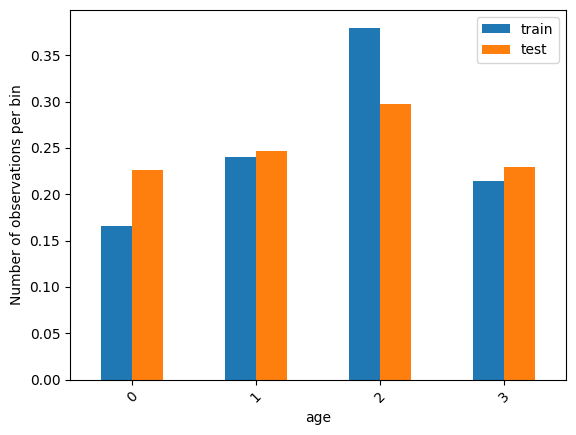

In [9]:
# and now let's explore the number of observations per bucket

t1 = train_t['age'].value_counts(normalize=True).sort_index()
t2 = test_t['age'].value_counts(normalize=True).sort_index()

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

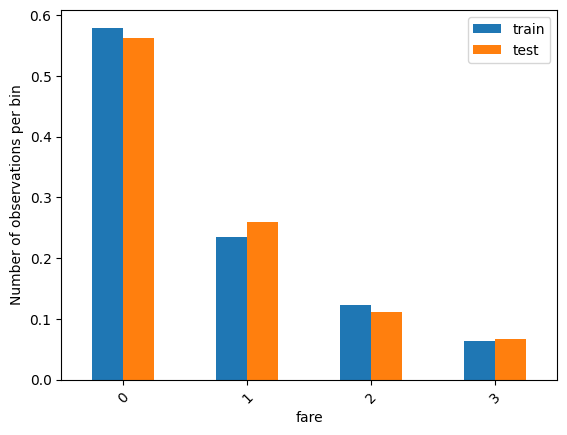

In [10]:
# and now let's explore the number of observations per bucket

t1 = train_t['fare'].value_counts(normalize=True).sort_index()
t2 = test_t['fare'].value_counts(normalize=True).sort_index()

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')